In [70]:
#from google.colab import drive
import numpy as np

#drive.mount('/content/drive')

#path = 'drive/MyDrive/MUIA/TFM'
path=''

In [71]:
from os import listdir

#Leer todos los nombres de los ficheros de las empresas sobre las que realizar analisis

data_path = f'{path}data/Cotizaciones_RAW_2005'

file_names = [f for f in listdir(data_path)]
print(file_names)

['A3M.MC.csv', 'ELE.MC.csv', 'BKT.MC.csv', 'ECR.MC.csv', 'REP.MC.csv', 'RED.MC.csv', 'CAF.MC.csv', 'EBRO.MC.csv', 'ALB.MC.csv', 'VID.MC.csv', 'ENC.MC.csv', 'TEF.MC.csv', 'NHH.MC.csv', 'MEL.MC.csv', 'PSG.MC.csv', 'SCYR.MC.csv', 'ITX.MC.csv', 'ACS.MC.csv', 'GCO.MC.csv', 'ENG.MC.csv', 'FAE.MC.csv', 'NTGY.MC.csv', 'PHM.MC.csv', 'VIS.MC.csv', 'SAN.MC.csv', 'BBVA.MC.csv', 'SAB.MC.csv', 'CIE.MC.csv', 'ACX.MC.csv', 'COL.MC.csv', 'ANA.MC.csv', 'TL5.MC.csv', 'MAP.MC.csv', 'IBE.MC.csv', 'IDR.MC.csv']


In [72]:
import pandas as pd

#Create a dictionary with all the historical data of each company
data_companies = {}

for file in file_names:
  df = pd.read_csv(f'{data_path}/{file}')
  ticker_name = file[:-7]
  data_companies[ticker_name] = df




In [73]:
df = data_companies['A3M']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-10-29,6.7025,7.6175,6.6250,6.8125,2.076218,50385084
1,2003-10-30,6.9400,7.1875,6.8650,7.1875,2.190506,7497408
2,2003-10-31,7.0750,7.1225,6.9700,7.0250,2.140981,6820964
3,2003-11-03,6.9250,7.0250,6.8150,7.0000,2.133362,5600304
4,2003-11-04,6.9525,6.9975,6.8175,6.9750,2.125743,3965384
...,...,...,...,...,...,...,...
4962,2023-03-14,3.4500,3.5000,3.4300,3.4660,3.466000,264946
4963,2023-03-15,3.4520,3.4580,3.3400,3.3800,3.380000,570627
4964,2023-03-16,3.4240,3.4260,3.3400,3.3800,3.380000,418165
4965,2023-03-17,3.4060,3.4180,3.3140,3.3460,3.346000,357818


In [74]:
# Comprobación inicial para ver cual es el historico de datos disponible 
def check_first_date (data_companies):
  companies = []
  starts = []

  for company in data_companies:
    df = data_companies[company]
    #print(company)
    #print(df)
    start = df.iloc[0][0]
    companies.append(company)
    starts.append(start)

  data = {'Company': companies, 'Starting_Data': starts}
  df = pd.DataFrame(data)

  return df

check_first_date(data_companies)

,Company,Starting_Data
0,A3M,2003-10-29
1,ELE,2000-01-03
2,BKT,2000-01-03
3,ECR,2000-01-03
4,REP,2000-01-03
5,RED,2000-01-03
6,CAF,2000-01-03
7,EBRO,2000-01-03
8,ALB,2000-01-03
9,VID,2000-01-03


In [75]:
# Eliminar datos previos a 2018
i = 0
data_companies_clean = {}
for company in data_companies:
  df = data_companies[company]
  # Dropping the rows of team 1 and team 2
  df = df[df["Date"].str.contains("2000|2001|2002|2003|2004") == False]
  data_companies_clean[company] = df

# Comprobacion que todas las empresas tienen datos a partir del mismo punto de inicio
check_first_date(data_companies_clean)

,Company,Starting_Data
0,A3M,2005-01-03
1,ELE,2005-01-03
2,BKT,2005-01-03
3,ECR,2005-01-03
4,REP,2005-01-03
5,RED,2005-01-03
6,CAF,2005-01-03
7,EBRO,2005-01-03
8,ALB,2005-01-03
9,VID,2005-01-03


In [76]:
df = data_companies_clean['A3M']
df

,Date,Open,High,Low,Close,Adj Close,Volume
308,2005-01-03,13.1750,13.1250,13.5625,13.6250,4.152435,286000
309,2005-01-04,13.4250,13.3875,14.0000,14.3125,4.361964,652436
310,2005-01-05,13.9875,13.8875,13.9875,14.1250,4.304819,1494168
311,2005-01-06,14.1250,14.1250,14.1250,14.1250,4.304819,0
312,2005-01-07,14.0250,13.9875,14.7625,14.8125,4.514347,667316
...,...,...,...,...,...,...,...
4962,2023-03-14,3.4500,3.5000,3.4300,3.4660,3.466000,264946
4963,2023-03-15,3.4520,3.4580,3.3400,3.3800,3.380000,570627
4964,2023-03-16,3.4240,3.4260,3.3400,3.3800,3.380000,418165
4965,2023-03-17,3.4060,3.4180,3.3140,3.3460,3.346000,357818


In [77]:
#Check if there are diferent dimension on data...
for company in data_companies_clean:
  df = data_companies_clean[company]
  print(company)
  print(np.shape(df))

A3M
(4659, 7)
ELE
(4654, 7)
BKT
(4661, 7)
ECR
(4661, 7)
REP
(4654, 7)
RED
(4654, 7)
CAF
(4651, 7)
EBRO
(4650, 7)
ALB
(4661, 7)
VID
(4661, 7)
ENC
(4661, 7)
TEF
(4654, 7)
NHH
(4654, 7)
MEL
(4654, 7)
PSG
(4654, 7)
SCYR
(4661, 7)
ITX
(4654, 7)
ACS
(4661, 7)
GCO
(4661, 7)
ENG
(4654, 7)
FAE
(4660, 7)
NTGY
(4660, 7)
PHM
(4661, 7)
VIS
(4654, 7)
SAN
(4661, 7)
BBVA
(4654, 7)
SAB
(4661, 7)
CIE
(4659, 7)
ACX
(4654, 7)
COL
(4650, 7)
ANA
(4654, 7)
TL5
(4661, 7)
MAP
(4659, 7)
IBE
(4661, 7)
IDR
(4654, 7)


We have different data dimension. Steps:
1. Check which company has missing values
2. Create a new row with dates on list of missing values for each company
2. Imputate the missing values with the last value

In [78]:
# Chech for missing dates for each company


# Define a list of dates to check
date_list = data_companies_clean['ECR'][['Date']].values.reshape(-1,).tolist() #4661 rows
print(date_list)
# Save each company missing dates on a dict
missing = {}
for company in data_companies_clean:
  print(company)
  df = data_companies_clean[company]
  #print(df['Date'])

  # Convert the 'Date' column to a datetime format
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])

  
  # Get the set of dates present in the DataFrame
  present_dates = set(df['Date'].dt.date.astype(str))

  # Get the set of missing dates
  missing_dates = set(date_list) - present_dates

  # Print the missing dates
  print(missing_dates)
  missing[company] = missing_dates
  print('---')





['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12', '2005-01-13', '2005-01-14', '2005-01-17', '2005-01-18', '2005-01-19', '2005-01-20', '2005-01-21', '2005-01-24', '2005-01-25', '2005-01-26', '2005-01-27', '2005-01-28', '2005-01-31', '2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04', '2005-02-07', '2005-02-08', '2005-02-09', '2005-02-10', '2005-02-11', '2005-02-14', '2005-02-15', '2005-02-16', '2005-02-17', '2005-02-18', '2005-02-21', '2005-02-22', '2005-02-23', '2005-02-24', '2005-02-25', '2005-02-28', '2005-03-01', '2005-03-02', '2005-03-03', '2005-03-04', '2005-03-07', '2005-03-08', '2005-03-09', '2005-03-10', '2005-03-11', '2005-03-14', '2005-03-15', '2005-03-16', '2005-03-17', '2005-03-18', '2005-03-21', '2005-03-22', '2005-03-23', '2005-03-24', '2005-03-25', '2005-03-28', '2005-03-29', '2005-03-30', '2005-03-31', '2005-04-01', '2005-04-04', '2005-04-05', '2005-04-06', '2005-04-07', '2005-04-08', '2005-04-11', '2005

/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
NHH
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
MEL
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
PSG
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
SCYR
set()
---
ITX
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
ACS
set()
---
GCO
set()
---
ENG
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
FAE
{'2007-12-24'}
---
NTGY
{'2008-07-30'}
---
PHM
set()
---
VIS
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
SAN
set()
---
BBVA
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
SAB


/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

set()
---
CIE
{'2008-08-27', '2009-01-06'}
---
ACX
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
COL
{'2007-01-01', '2008-01-02', '2005-05-12', '2006-01-06', '2008-03-11', '2005-03-28', '2008-04-25', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
ANA
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---
TL5
set()
---
MAP
{'2007-01-01', '2007-12-24'}
---
IBE
set()
---
IDR
{'2007-01-01', '2006-01-06', '2005-03-28', '2005-03-25', '2007-12-24', '2005-01-06', '2005-12-26'}
---


/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_21898/2686261702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [79]:
print(missing['MAP'])

{'2007-01-01', '2007-12-24'}


In [80]:




for company in data_companies_clean:
    #print(company)
    df = data_companies_clean[company]
    missing_dates = missing[company]

    # Loop through the missing dates and add a row with value 0 for the 'Close' column
    for date in missing_dates:
        # Create a new DataFrame with the missing date and value 0 for 'Close'

        new_row = pd.DataFrame({'Date': pd.to_datetime(date), 'Close': [np.nan]})
    
        # Find the correct position to insert the new row
        position = df[df['Date'] > new_row['Date'][0]].index.min()
        
        # Insert the new row at the correct position
        df = pd.concat([df.iloc[:position], new_row, df.iloc[position:]]).reset_index(drop=True)
        
        # Imputate last values for NaN values (created for missing values)
        df['Close'] = df['Close'].fillna(method='ffill')
        
        data_companies_clean[company] = df
        
    



In [81]:
data_companies_clean

{'A3M':            Date     Open     High      Low    Close  Adj Close     Volume
 0    2005-01-03  13.1750  13.1250  13.5625  13.6250   4.152435   286000.0
 1    2005-01-04  13.4250  13.3875  14.0000  14.3125   4.361964   652436.0
 2    2005-01-05  13.9875  13.8875  13.9875  14.1250   4.304819  1494168.0
 3    2005-01-06  14.1250  14.1250  14.1250  14.1250   4.304819        0.0
 4    2005-01-07  14.0250  13.9875  14.7625  14.8125   4.514347   667316.0
 ...         ...      ...      ...      ...      ...        ...        ...
 4656 2023-03-14   3.4500   3.5000   3.4300   3.4660   3.466000   264946.0
 4657 2023-03-15   3.4520   3.4580   3.3400   3.3800   3.380000   570627.0
 4658 2023-03-16   3.4240   3.4260   3.3400   3.3800   3.380000   418165.0
 4659 2023-03-17   3.4060   3.4180   3.3140   3.3460   3.346000   357818.0
 4660 2023-03-20   3.3260   3.3580   3.2600   3.3400   3.340000   389817.0
 
 [4661 rows x 7 columns],
 'ELE':            Date       Open       High        Low      Clo

In [82]:
#Check if there are diferent dimension on data...
for company in data_companies_clean:
  df = data_companies_clean[company]
  print(company)
  print(np.shape(df))

A3M
(4661, 7)
ELE
(4661, 7)
BKT
(4661, 7)
ECR
(4661, 7)
REP
(4661, 7)
RED
(4661, 7)
CAF
(4661, 7)
EBRO
(4661, 7)
ALB
(4661, 7)
VID
(4661, 7)
ENC
(4661, 7)
TEF
(4661, 7)
NHH
(4661, 7)
MEL
(4661, 7)
PSG
(4661, 7)
SCYR
(4661, 7)
ITX
(4661, 7)
ACS
(4661, 7)
GCO
(4661, 7)
ENG
(4661, 7)
FAE
(4661, 7)
NTGY
(4661, 7)
PHM
(4661, 7)
VIS
(4661, 7)
SAN
(4661, 7)
BBVA
(4661, 7)
SAB
(4661, 7)
CIE
(4661, 7)
ACX
(4661, 7)
COL
(4661, 7)
ANA
(4661, 7)
TL5
(4661, 7)
MAP
(4661, 7)
IBE
(4661, 7)
IDR
(4661, 7)


In [83]:
# Crear un dataframe que sirva como entrada al modelo TDA
# Columna1 = fecha. El resto de columnas serán cada una de las empresas
# Filas = cada fila representa el precio de cierre en el dia determinado


#dates = data_companies_clean['ECR'][['Date']].values.reshape(-1,).tolist() 
dates = date_list

print(dates)
df_TDA = pd.DataFrame()
df_TDA['Date'] = dates
print(df_TDA)


for company in data_companies_clean:
  print(company)
  prices = pd.Series(data_companies_clean[company][['Close']].values.reshape(-1,).tolist())
  df_TDA[company] = prices

df_TDA


['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12', '2005-01-13', '2005-01-14', '2005-01-17', '2005-01-18', '2005-01-19', '2005-01-20', '2005-01-21', '2005-01-24', '2005-01-25', '2005-01-26', '2005-01-27', '2005-01-28', '2005-01-31', '2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04', '2005-02-07', '2005-02-08', '2005-02-09', '2005-02-10', '2005-02-11', '2005-02-14', '2005-02-15', '2005-02-16', '2005-02-17', '2005-02-18', '2005-02-21', '2005-02-22', '2005-02-23', '2005-02-24', '2005-02-25', '2005-02-28', '2005-03-01', '2005-03-02', '2005-03-03', '2005-03-04', '2005-03-07', '2005-03-08', '2005-03-09', '2005-03-10', '2005-03-11', '2005-03-14', '2005-03-15', '2005-03-16', '2005-03-17', '2005-03-18', '2005-03-21', '2005-03-22', '2005-03-23', '2005-03-24', '2005-03-25', '2005-03-28', '2005-03-29', '2005-03-30', '2005-03-31', '2005-04-01', '2005-04-04', '2005-04-05', '2005-04-06', '2005-04-07', '2005-04-08', '2005-04-11', '2005

,Date,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
0,2005-01-03,13.6250,17.080000,4.914858,5.800,19.200001,4.1250,6.175000,10.404929,26.000000,...,12.614568,2.563590,2.060349,11.940,223.617294,65.550003,13.907362,2.181585,4.6225,12.71
1,2005-01-04,14.3125,17.000000,4.893535,5.900,19.160000,4.1675,6.175000,10.484125,26.500000,...,12.547316,2.578408,2.042510,11.910,223.617294,66.599998,14.567894,2.193495,4.6500,12.73
2,2005-01-05,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.161734,4.6000,12.60
3,2005-01-06,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.124018,4.6000,12.60
4,2005-01-07,14.8125,16.740000,4.889773,5.900,18.879999,4.1050,6.320000,10.711829,25.850000,...,12.604961,2.533953,2.051430,11.420,220.703705,65.750000,14.857442,2.149824,4.6275,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,2023-03-14,3.4660,18.885000,6.098000,4.235,14.390000,15.7450,26.350000,16.600000,44.849998,...,6.690000,1.139000,26.120001,9.696,6.130000,177.000000,3.098000,1.913000,10.8600,11.57
4657,2023-03-15,3.3800,18.490000,5.704000,3.980,13.390000,15.4200,25.450001,16.260000,44.450001,...,6.048000,1.019500,25.260000,9.024,5.945000,173.300003,3.052000,1.822000,10.8750,11.34
4658,2023-03-16,3.3800,18.795000,5.560000,4.055,13.305000,15.6050,24.799999,16.400000,44.799999,...,6.254000,1.014500,25.580000,9.034,5.855000,176.199997,3.062000,1.832000,11.0500,11.37
4659,2023-03-17,3.3460,18.525000,5.420000,3.985,13.485000,15.4250,24.750000,16.459999,45.299999,...,6.036000,0.982600,24.740000,8.982,5.810000,177.000000,3.022000,1.801000,10.9200,11.22


In [84]:
# Verificar si hay datos que sean 0
0 in df_TDA.values

False

In [85]:
# Verificar si algun valor es null
df_TDA.isnull().sum()

Date    0
A3M     0
ELE     0
BKT     0
ECR     0
REP     0
RED     0
CAF     0
EBRO    0
ALB     0
VID     0
ENC     0
TEF     0
NHH     0
MEL     0
PSG     0
SCYR    0
ITX     0
ACS     0
GCO     0
ENG     0
FAE     0
NTGY    0
PHM     0
VIS     0
SAN     0
BBVA    0
SAB     0
CIE     0
ACX     0
COL     0
ANA     0
TL5     0
MAP     0
IBE     0
IDR     0
dtype: int64

In [86]:
df_TDA.to_excel(f'{path}data/stocks_spain_2000.xlsx')

Check historic data of IBEX35 (index). In order to check interestinf dates for future analysis

In [17]:
# Load the .csv file 
df_ibex = pd.read_csv(f'{path}data/IBEX.csv')
df_ibex = df_ibex[['Date', 'Close']]
df_ibex

,Date,Close
0,2000-01-03,11610.000000
1,2000-01-04,11206.599609
2,2000-01-05,10863.099609
3,2000-01-06,NaN
4,2000-01-07,11102.400391
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [18]:
# Checking for missing values
print(df_ibex.isnull().sum())

# Deleting missing values
df_ibex.dropna(subset=['Date', 'Close'], inplace=True)
print(df_ibex.isnull().sum())

# Save it to a new file
df_ibex.to_csv(f'{path}data/IBEX35_clean.csv')

Date      0
Close    64
dtype: int64
Date     0
Close    0
dtype: int64


In [19]:
print(np.shape(df_ibex))
df_ibex

(5903, 2)


,Date,Close
0,2000-01-03,11610.000000
1,2000-01-04,11206.599609
2,2000-01-05,10863.099609
4,2000-01-07,11102.400391
5,2000-01-10,11173.299805
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [20]:
df_ibex['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
4       2000-01-07
5       2000-01-10
           ...    
5962    2023-03-14
5963    2023-03-15
5964    2023-03-16
5965    2023-03-17
5966    2023-03-20
Name: Date, Length: 5903, dtype: object

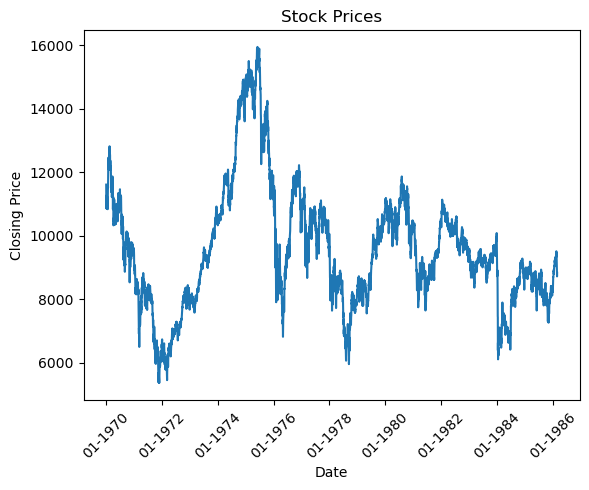

In [21]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter



# plot the dataframe
fig, ax = plt.subplots()
ax.plot(df_ibex['Date'], df_ibex['Close'])

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# set the plot title and axis labels
ax.set_title('Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# show the plot
plt.show()